# Depth-integrated KE and MKE in NW2

In [2]:
import xarray as xr

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 20}
pylab.rcParams.update(params)

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Open NW2 data

In [4]:
exp_list = [
    r'a) $1/4^\circ$', 
    r'b) $1/8^\circ$', 
    r'c) $1/16^\circ$', 
    r'd) $1/32^\circ$'
]

degree_list = [1/4, 1/8, 1/16, 1/32]

run_list = [
    'baselines/nw2_0.25deg_N15_baseline_hmix5',
    'baselines/nw2_0.125deg_N15_baseline_hmix5',
    'baselines/nw2_0.0625deg_N15_baseline_hmix5',
    'baselines/nw2_0.03125deg_N15_baseline_hmix5'
]

In [5]:
%%time

chunks = {'time': 1}
path = '/glade/p/univ/unyu0004/gmarques/NeverWorld2'

st_list = []
av_list = []
sn_list = []

for run in run_list:
    st = xr.open_dataset('%s/%s/static.nc' % (path, run), decode_times=False)
    st_list.append(st)

    av = xr.open_mfdataset('%s/%s/averages_*.nc' % (path, run), decode_times=False, chunks=chunks, combine='by_coords')
    av_list.append(av)
    
    sn = xr.open_mfdataset('%s/%s/snapshots_*.nc' % (path, run), decode_times=False, chunks=chunks, combine='by_coords')
    sn_list.append(sn)

CPU times: user 2.87 s, sys: 5.73 s, total: 8.6 s
Wall time: 2min 4s


# Compute and plot KE

In [6]:
for av, sn in zip(av_list, sn_list):
    # 5 day averages
    av['hKE'] = av['h'] * av['KE']
    # snapshots
    sn['hKE'] = sn['h'] * sn['KE']

In [7]:
from dask.diagnostics import ProgressBar

### Snapshots

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  3.4s


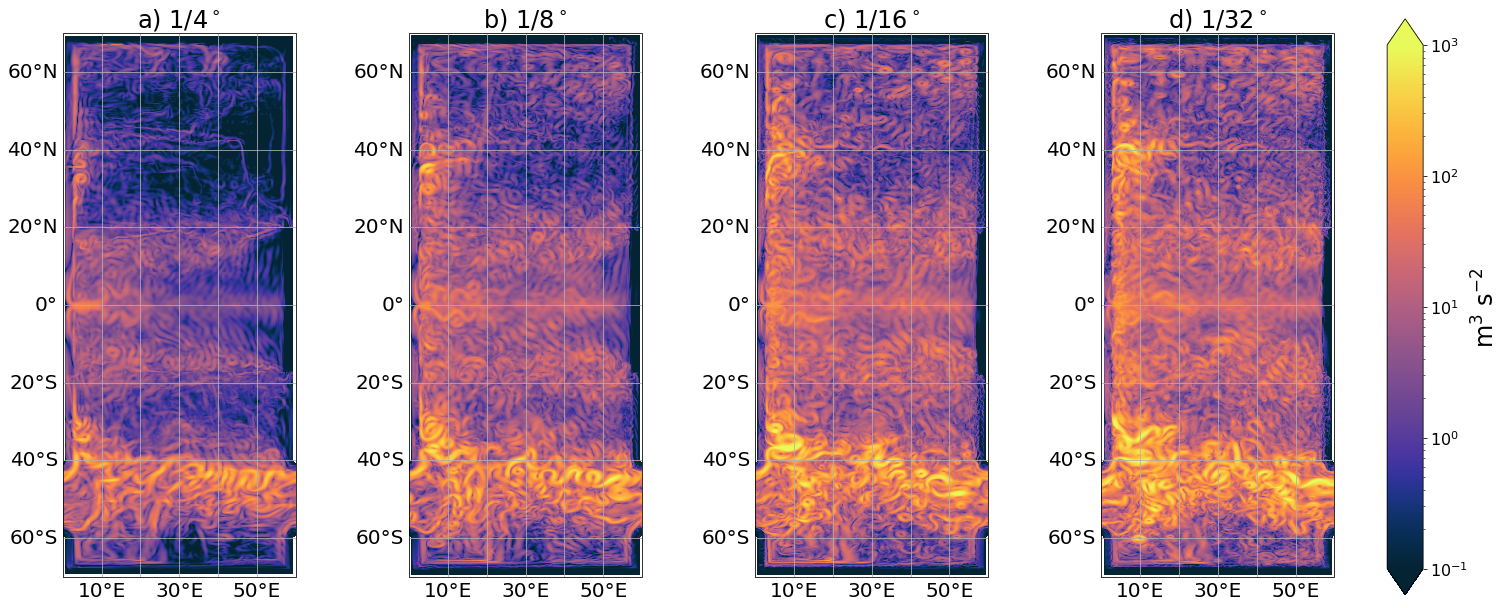

In [25]:
# snapshots
time = -1  # plot last snapshot that is available

vmin = 1e-1
vmax = 1e3
unit = r'm$^3$ s$^{-2}$'

fig,axs = plt.subplots(1,4,figsize=(25,10),subplot_kw={'projection':ccrs.PlateCarree()})

for exp, sn, ax in zip(exp_list, av_list, axs.flatten()):
    with ProgressBar():
        KE_snapshot = sn['hKE'].isel(time=time).sum(dim='zl').compute()

    p = KE_snapshot.plot(
        ax=ax,
        norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax),
        cmap=cmocean.cm.thermal,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    ax.set(title=exp)
    ax.set_extent([0, 60, -70, 70], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    
fig.subplots_adjust(right=0.85, wspace=0.3, hspace=0.3)
cax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
cbar = plt.colorbar(p, cax=cax, label=unit, extend='both')
cbar.ax.tick_params(labelsize=16) 

#fig.suptitle(r'Snapshots of depth-integrated kinetic energy = $\frac{1}{2} \sum_{n=1}^N h_n (u_n^2 + v_n^2)$', y=1.05)
plt.savefig('figures/depth_integrated_KE_snapshots.png', dpi=200,bbox_inches='tight',pad_inches=0)

### 5-day averages

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  3.6s


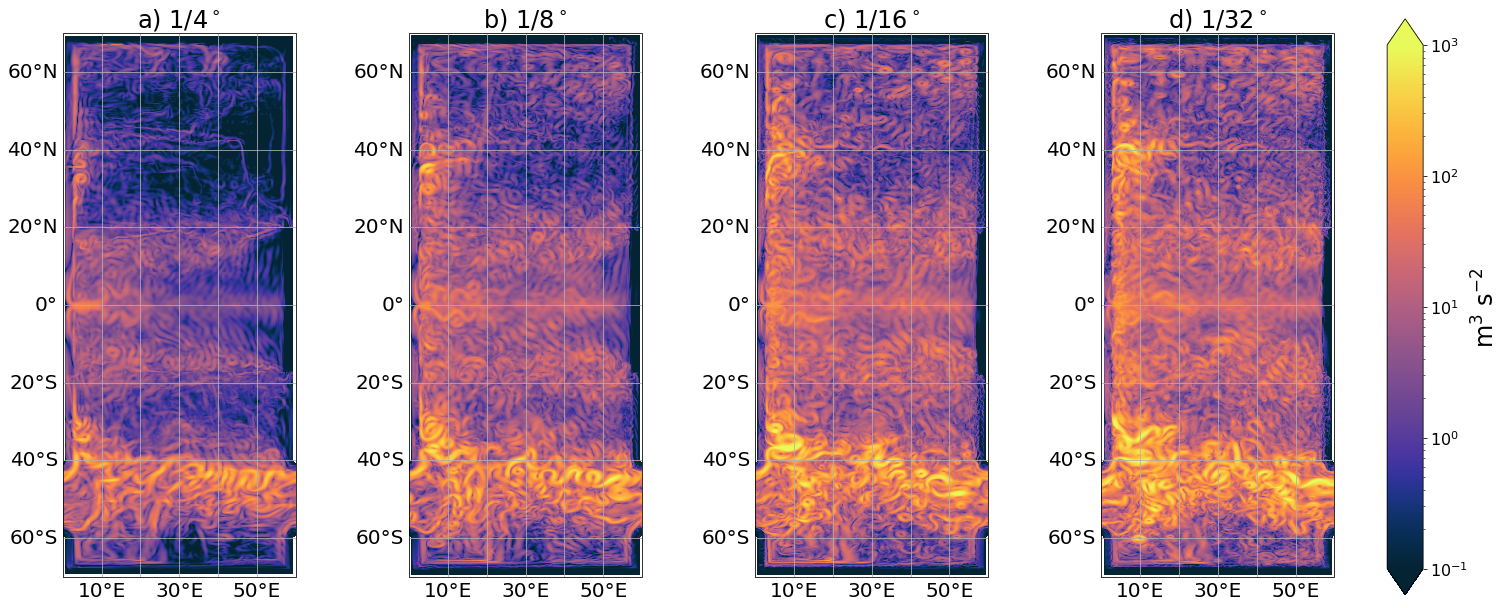

In [26]:
# 5 day averages
time = -1  # plot last 5-day average that is available

vmin = 1e-1
vmax = 1e3
unit = r'm$^3$ s$^{-2}$'

fig,axs = plt.subplots(1,4,figsize=(25,10),subplot_kw={'projection':ccrs.PlateCarree()})

for exp, av, ax in zip(exp_list, av_list, axs.flatten()):
    with ProgressBar():
        KE_5day = av['hKE'].isel(time=time).sum(dim='zl').compute()
        
    p = KE_5day.plot(
        ax=ax,
        norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax),
        cmap=cmocean.cm.thermal,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    ax.set(title=exp)
    ax.set_extent([0, 60, -70, 70], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    
fig.subplots_adjust(right=0.85, wspace=0.3, hspace=0.3)
cax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
cbar = plt.colorbar(p, cax=cax, label=unit, extend='both')
cbar.ax.tick_params(labelsize=16) 

#fig.suptitle(r'5-day averages of depth-integrated kinetic energy = $\frac{1}{2} \sum_{n=1}^N h_n (u_n^2 + v_n^2)$', y=1.05)
plt.savefig('figures/depth_integrated_KE_5day_avg.png', dpi=200,bbox_inches='tight',pad_inches=0)

### 500-day averages

[########################################] | 100% Completed | 18.8s
[########################################] | 100% Completed | 47.3s
[########################################] | 100% Completed |  1min 55.6s
[########################################] | 100% Completed |  6min  9.0s


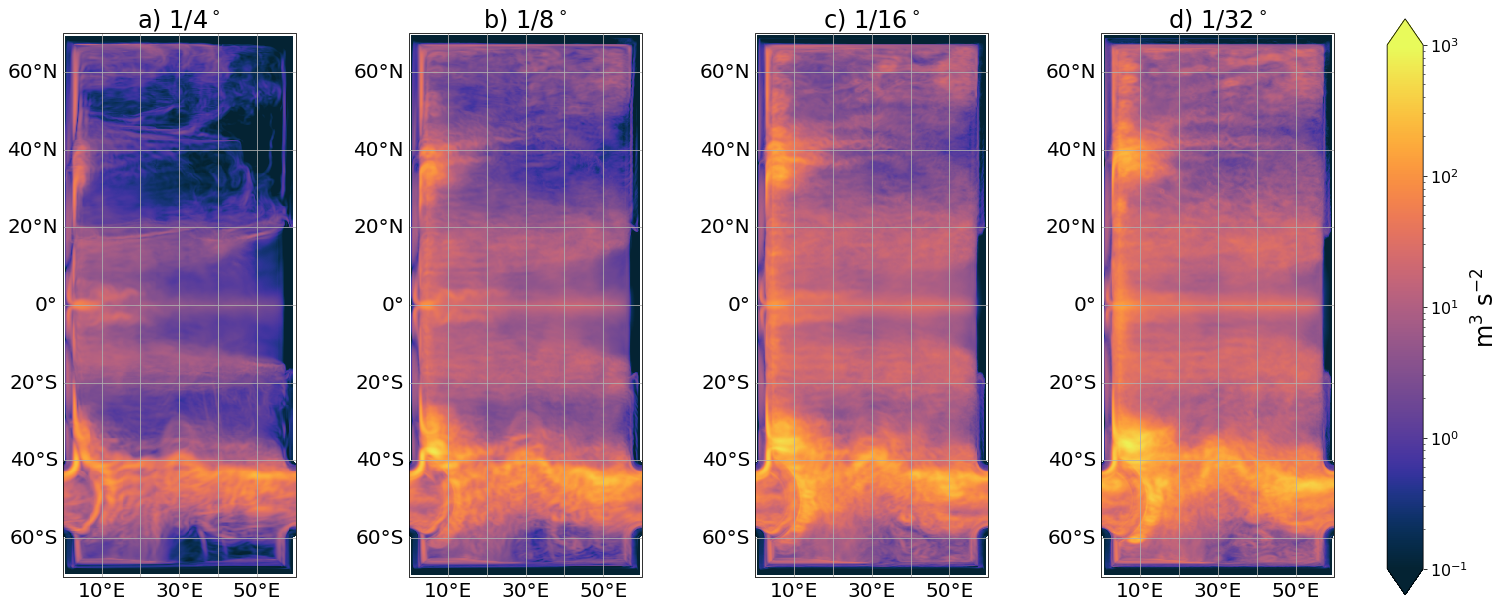

In [24]:
# 500-day averages
timeslice = slice(-100, None)  # plot average over last 500 days that are available

vmin = 1e-1
vmax = 1e3
unit = r'm$^3$ s$^{-2}$'

fig,axs = plt.subplots(1,4,figsize=(25,10),subplot_kw={'projection':ccrs.PlateCarree()})

for exp, av, st, ax in zip(exp_list, av_list, st_list, axs.flatten()):
    with ProgressBar():
        KE_500day = av['hKE'].sum(dim='zl').isel(time=timeslice).mean(dim='time').compute()
        
    # domain integral in PJ = 10^15 J = 10^15 kg*m^2/s^2; convert m^5/s^2 to J using reference density of 1000kg/m^3
    domain_integral = (KE_500day * st.area_t).sum(dim=['yh', 'xh']) * 1000 / 1e15

    p = KE_500day.plot(
        ax=ax,
        norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax),
        cmap=cmocean.cm.thermal,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    ax.set(title=exp)
    ax.set_extent([0, 60, -70, 70], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    #ax.text(30, -90, r'$\int\int [\cdot] dx dy$ = %i PJ' %domain_integral.round(), horizontalalignment='center')
    
fig.subplots_adjust(right=0.85, wspace=0.3, hspace=0.3)
cax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
cbar = plt.colorbar(p, cax=cax, label=unit, extend='both')
cbar.ax.tick_params(labelsize=16) 

#fig.suptitle(r'500-day averages of depth-integrated kinetic energy = $\frac{1}{2} \sum_{n=1}^N h_n (u_n^2 + v_n^2)$', y=1.05)
plt.savefig('figures/depth_integrated_KE_500day_avg.png', dpi=200,bbox_inches='tight',pad_inches=0)

# Compute MKE via spatial filtering

### Set target resolution 
This is the resolution to which we want to filter all 4 simulations in the hierarchy

In [8]:
target_resolution = 1/4  
filter_shape = 'TAPER'
#filter_shape = 'GAUSSIAN'
#target_resolution = 1  # 1 degree is probably more the effective resolution of our coarsest resolution run?

In [9]:
# compute filter factors
filter_factor_list = []
for degree in degree_list:
    filter_factor = target_resolution / degree
    filter_factor_list.append(filter_factor)
filter_factor_list

[1.0, 2.0, 4.0, 8.0]

In [10]:
import gcm_filters

In [11]:
doGPU = True  # doGPU will be much faster

In [12]:
gcm_filters.required_grid_vars(gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

### Create 4 filters each for T-fields, U-fields, V-fields

In [13]:
if filter_shape == 'TAPER':
    shape = gcm_filters.FilterShape.TAPER
if filter_shape == 'GAUSSIAN':
    shape = gcm_filters.FilterShape.GAUSSIAN
shape

<FilterShape.TAPER: 2>

In [14]:
filter_list_t = []
filter_list_u = []
filter_list_v = []

for filter_factor, st in zip(filter_factor_list, st_list):
    # each of the 4 simulations has their own area and wet_mask info
    area_t = st.area_t
    area_u = st.area_u.isel(xq = slice(1,None))
    area_v = st.area_v.isel(yq = slice(1,None))
    wet_mask_t = st.wet
    wet_mask_u = st.wet_u.isel(xq = slice(1,None))
    wet_mask_v = st.wet_v.isel(yq = slice(1,None))
    
    if doGPU: # then convert numpy to cupy arrays
        import cupy as cp
        
         # T-arrays
        area_t = area_t.chunk({'yh': len(st.yh),'xh': len(st.xh)}) # 1 chunk
        area_t.data = area_t.data.map_blocks(cp.asarray)   
        wet_mask_t = wet_mask_t.chunk({'yh': len(st.yh),'xh': len(st.xh)}) # 1 chunk
        wet_mask_t.data = wet_mask_t.data.map_blocks(cp.asarray)           
        # U-arrays
        area_u = area_u.chunk({'yh': len(st.yh),'xq': len(st.xh)}) # 1 chunk
        area_u.data = area_u.data.map_blocks(cp.asarray) 
        wet_mask_u = wet_mask_u.chunk({'yh': len(st.yh),'xq': len(st.xh)}) # 1 chunk
        wet_mask_u.data = wet_mask_u.data.map_blocks(cp.asarray) 
        # V-arrays
        area_v = area_v.chunk({'yq': len(st.yh),'xh': len(st.xh)}) # 1 chunk
        area_v.data = area_v.data.map_blocks(cp.asarray)   
        wet_mask_v = wet_mask_v.chunk({'yq': len(st.yh),'xh': len(st.xh)}) # 1 chunk
        wet_mask_v.data = wet_mask_v.data.map_blocks(cp.asarray)   
        
    # now create filters
    # T-fields
    filter_t = gcm_filters.Filter(
        filter_scale=filter_factor,
        dx_min=1,
        filter_shape=shape,  
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
        grid_vars={'area': area_t, 'wet_mask': wet_mask_t}
    )
    filter_list_t.append(filter_t)    

    # U-fields
    filter_u = gcm_filters.Filter(
        filter_scale=filter_factor,
        dx_min=1,
        filter_shape=shape, 
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
        grid_vars={'area': area_u, 'wet_mask': wet_mask_u}
    )
    filter_list_u.append(filter_u)    
    
    # V-fields
    filter_v = gcm_filters.Filter(
        filter_scale=filter_factor,
        dx_min=1,
        filter_shape=shape,  
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
        grid_vars={'area': area_v, 'wet_mask': wet_mask_v}
    )
    filter_list_v.append(filter_v)    

In [15]:
filter_list_t

[Filter(filter_scale=1.0, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=4, n_iterations=1, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>),
 Filter(filter_scale=2.0, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=8, n_iterations=1, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>),
 Filter(filter_scale=4.0, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=16, n_iterations=1, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>),
 Filter(filter_scale=8.0, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=32, n_iterations=1, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>)]

### Filtering

In [16]:
import numpy as np

In [17]:
av_f_list = [] # list for filtered fields
for av in av_list:
    av_f = xr.Dataset() # new xarray dataset for filtered fields
    for dim in av.dims:
        av_f[dim] = av[dim]
        
    av_f_list.append(av_f)

In [18]:
# transform symmetric data to non-symmetric data to avoid double-counting of westernmost = easternmost point in channel while filtering
av_nonsym_list = []
for av in av_list:
    av_nonsym = av.isel(xq = slice(1,None), yq=slice(1,None))
    av_nonsym_list.append(av_nonsym)

In [19]:
for av, av_f, filter_t, filter_u, filter_v in zip(av_nonsym_list, av_f_list, filter_list_t, filter_list_u, filter_list_v):
    av = av.astype(np.float64) # filtering at higher precision avoids numerical instability
            
    # filter T-fields with filter_t
    namelist = ['h', 'hKE']

    for name in namelist:
        field = av[name].copy()
        if doGPU:
            field.data = field.data.map_blocks(cp.asarray)        
        field_filtered = filter_t.apply(field, dims=['yh', 'xh'])

        if doGPU:
            field_filtered.data = field_filtered.data.map_blocks(cp.asnumpy)

        av_f[name] = field_filtered.copy()             

    # filter U-fields with filter_u
    namelist = ['u']

    for name in namelist:
        field = av[name].copy()
        if doGPU:
            field.data = field.data.map_blocks(cp.asarray)        
        field_filtered = filter_u.apply(field, dims=['yh', 'xq'])

        if doGPU:
            field_filtered.data = field_filtered.data.map_blocks(cp.asnumpy)

        av_f[name] = field_filtered.copy()             

    # filter V-fields with filter_v
    namelist = ['v']

    for name in namelist:
        field = av[name].copy()
        if doGPU:
            field.data = field.data.map_blocks(cp.asarray)        
        field_filtered = filter_v.apply(field, dims=['yq', 'xh'])

        if doGPU:
            field_filtered.data = field_filtered.data.map_blocks(cp.asnumpy)

        av_f[name] = field_filtered.copy()   


## Compute MKE from filtered fields

### Convert back to symmetric grid...
... so we can interpolate u to T-points across the periodic channel

In [20]:
for av_f, st in zip(av_f_list, st_list):
    for name in av_f.data_vars:
        if 'xq' in av_f[name].dims:
            # append easternmost column as westernmost column
            av_f[name] = xr.where(av_f.xq==av_f.xq[0], av_f[name].roll(xq=1,roll_coords=False), av_f[name])
            av_f[name] = av_f[name].where(st.wet_u)
        if 'yq' in av_f[name].dims:
            # set yq = 0 to nan's (all land):
            av_f[name] = xr.where(av_f.yq==av_f.yq[0], np.nan, av_f[name])
            av_f[name] = av_f[name].where(st.wet_v)    

In [21]:
from xgcm import Grid

coords = {'X': {'center': 'xh', 'outer': 'xq'},
            'Y': {'center': 'yh', 'outer': 'yq'},
            'Z': {'center': 'zl', 'outer': 'zi'} }

In [22]:
for av_f, st in zip(av_f_list, st_list):
 
    grid = Grid(st, coords=coords, periodic=['X'])
    
    av_f['MKE'] = (
        0.5 * av_f['h'] * (
            grid.interp((av_f['u']**2).fillna(value=0),'X') 
            + grid.interp((av_f['v']**2).fillna(value=0),'Y') 
        )
    )
    
    av_f['EKE'] = av_f['hKE'] - av_f['MKE']
    

### Compute 500-day average of depth-integrated MKE and EKE
including triggering filter computation

In [23]:
timeslice = slice(-100, None)  # last 500 days that are available

MKE_list = []
EKE_list = []

for av_f in av_f_list:
    with ProgressBar():
        MKE = av_f['MKE'].sum(dim='zl').isel(time=timeslice).mean(dim='time').compute() 
        EKE = av_f['EKE'].sum(dim='zl').isel(time=timeslice).mean(dim='time').compute() 
    MKE_list.append(MKE)
    EKE_list.append(EKE)

[########################################] | 100% Completed | 30.6s
[########################################] | 100% Completed | 38.7s
[########################################] | 100% Completed |  1min 57.0s
[########################################] | 100% Completed |  2min 30.1s
[########################################] | 100% Completed |  7min 35.9s
[########################################] | 100% Completed |  9min 23.6s
[########################################] | 100% Completed | 35min 35.6s
[########################################] | 100% Completed | 43min 19.6s


### Plot 2D map of 500-day average of depth-integrated MKE

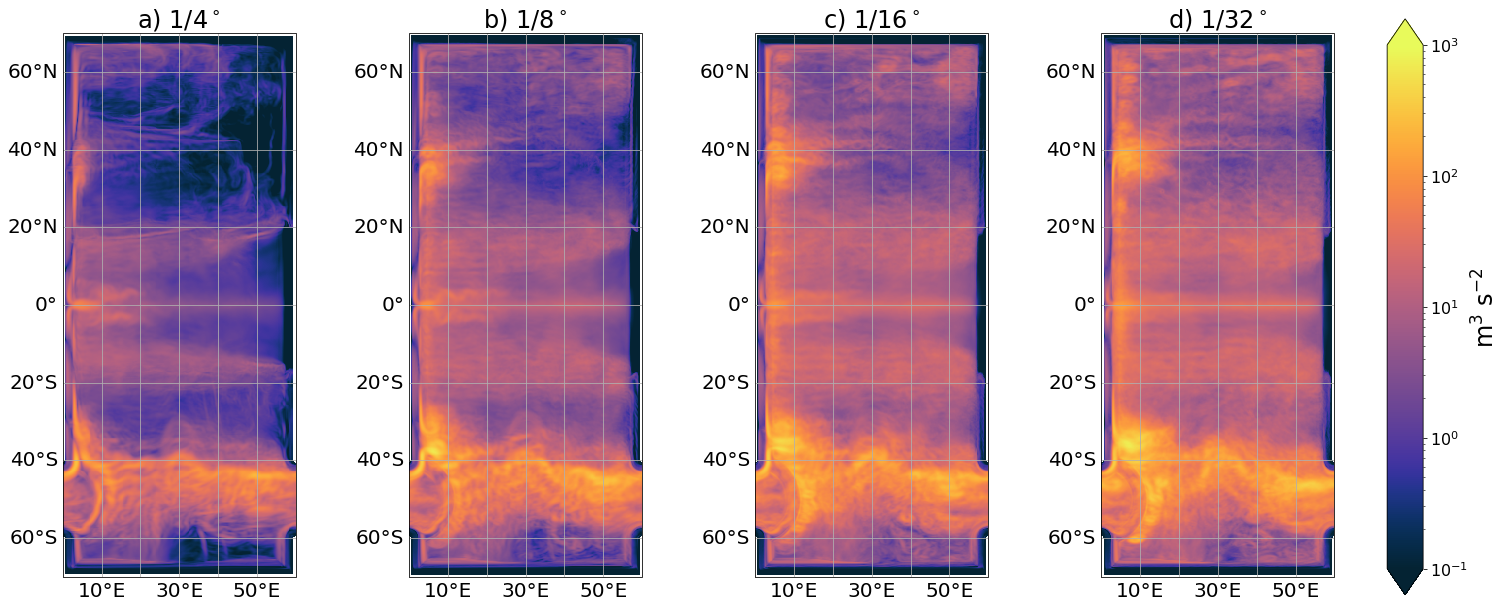

In [27]:
vmin = 1e-1
vmax = 1e3
unit = r'm$^3$ s$^{-2}$'

fig,axs = plt.subplots(1,4,figsize=(25,10),subplot_kw={'projection':ccrs.PlateCarree()})

for MKE, exp, st, ax in zip(MKE_list, exp_list, st_list, axs.flatten()):

    # domain integral in PJ = 10^15 J = 10^15 kg*m^2/s^2; convert m^5/s^2 to J using reference density of 1000kg/m^3
    domain_integral = (MKE * st.area_t).sum(dim=['yh', 'xh']) * 1000 / 1e15
    
    p = MKE.plot(
        ax=ax,
        norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax),
        cmap=cmocean.cm.thermal,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    ax.set(title=exp)
    ax.set_extent([0, 60, -70, 70], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    #ax.text(30, -90, r'$\int\int [\cdot] dx dy$ = %i PJ' %domain_integral.round(), horizontalalignment='center')

fig.subplots_adjust(right=0.85, wspace=0.3, hspace=0.3)
cax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
cbar = plt.colorbar(p, cax=cax, label=unit, extend='both')
cbar.ax.tick_params(labelsize=16) 

#fig.suptitle(r'500-day averages of depth-integrated MKE = $\frac{1}{2} \sum_{n=1}^N \bar{h}_n (\bar{u}_n^2 + \bar{v}_n^2)$', y=1.05)
plt.savefig('figures/depth_integrated_MKE_500day_avg_filter_%gdegree_%s.png' %(target_resolution, filter_shape), dpi=200,bbox_inches='tight',pad_inches=0)

### Plot zonal integral of 500-day averaged depth-integrated MKE and EKE

In [28]:
exp_list = [
    r'$1/4^\circ$', 
    r'$1/8^\circ$', 
    r'$1/16^\circ$', 
    r'$1/32^\circ$'
]

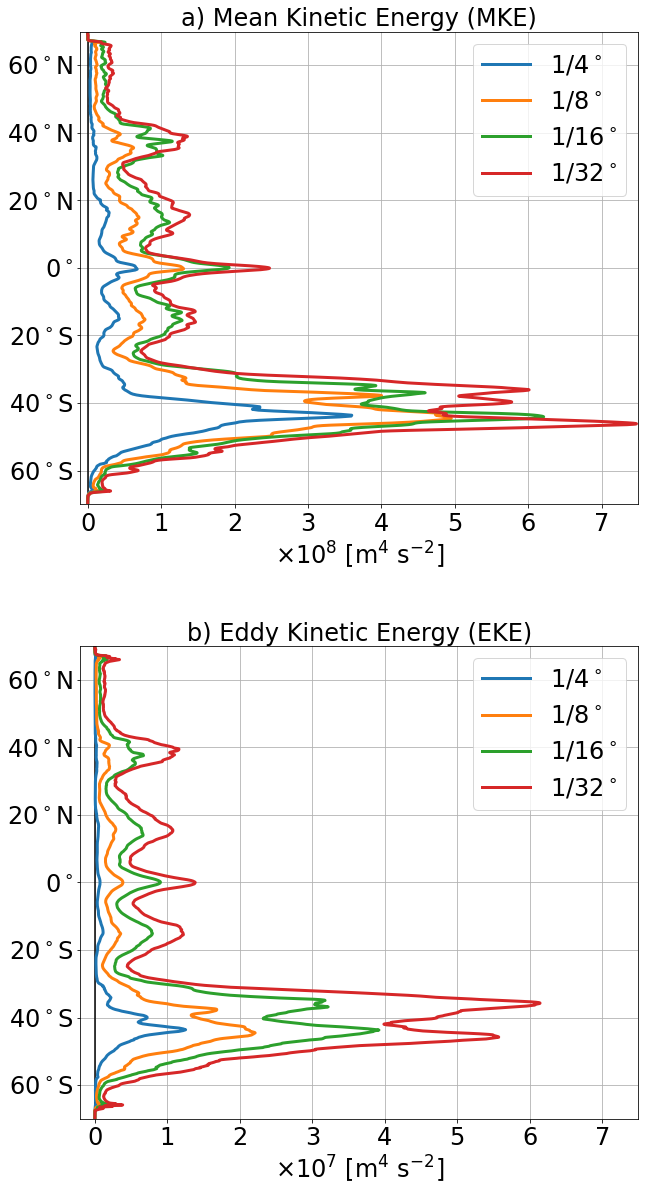

In [32]:
fig, axs = plt.subplots(2,1, figsize=(10,20))

ax = axs[0]
for MKE, st, exp in zip (MKE_list, st_list, exp_list):
    
    # set up grid object using xgcm to get dxT, dyT
    grid = Grid(st, coords=coords, periodic=['X'])

    coords = {'X': {'center': 'xh', 'outer': 'xq'},
                'Y': {'center': 'yh', 'outer': 'yq'}
             }
    grid = Grid(st, coords=coords, periodic=['X'])

    st['dxT'] = grid.interp(st.dxCu,'X')
    
    MKE_zonal_integral = (MKE * st.dxT).sum(dim='xh')
    
    # to get labels right
    #ax.plot([], [], color ='blue', label ='MKE')
    #ax.plot([], [], color ='orange', label ='EKE')
    #ax.stackplot(st.yh, MKE_zonal_integral, EKE_zonal_integral, colors =['blue', 'orange'])
    MKE_zonal_integral.plot(ax=ax, y='yh', linewidth=3, label=exp)
    
ax.vlines(0, -70, 70, color='k')
ax.set(ylabel='', xlabel='', title='a) Mean Kinetic Energy (MKE)')

ax.set_yticks(ticks=np.arange(-60.01, 60, 20))
ax.set(yticklabels=[r'60$^\circ$S', r'40$^\circ$S', r'20$^\circ$S',  r'0$^\circ$',  r'20$^\circ$N', r'40$^\circ$N', r'60$^\circ$N'])
ax.set_ylim(-70, 70)

ax.set_xlim(-1e7, 7.5e8) 
ax.set_xticks(ticks=np.arange(0, 7.1) * 1e8)
ax.set(xticklabels=['0', '1', '2', '3', '4', '5', '6', '7'])
ax.set(xlabel=r'$\times 10^8$ [m$^4$ s$^{-2}$]')
#ax.grid('on')
ax.grid(which='both')
ax.legend()

ax = axs[1]
for EKE, st, exp in zip (EKE_list, st_list, exp_list):
    
    # set up grid object using xgcm to get dxT, dyT
    grid = Grid(st, coords=coords, periodic=['X'])

    coords = {'X': {'center': 'xh', 'outer': 'xq'},
                'Y': {'center': 'yh', 'outer': 'yq'}
             }
    grid = Grid(st, coords=coords, periodic=['X'])

    st['dxT'] = grid.interp(st.dxCu,'X')
    
    EKE_zonal_integral = (EKE * st.dxT).sum(dim='xh')
    EKE_zonal_integral.plot(ax=ax, y='yh', linewidth=3, label=exp)
    
ax.vlines(0, -70, 70, color='k')
ax.set(ylabel='', xlabel='', title='b) Eddy Kinetic Energy (EKE)')
ax.set_yticks(ticks=np.arange(-60.01, 60, 20))
ax.set(yticklabels=[])
ax.set(yticklabels=[r'60$^\circ$S', r'40$^\circ$S', r'20$^\circ$S',  r'0$^\circ$',  r'20$^\circ$N', r'40$^\circ$N', r'60$^\circ$N'])
ax.set_ylim(-70, 70)
ax.set_xlim(-0.2e7, 0.75e8) 

ax.set_xticks(ticks=np.arange(0, 7.1) * 1e7)
ax.set(xticklabels=['0', '1', '2', '3', '4', '5', '6', '7'])
ax.set(xlabel=r'$\times 10^7$ [m$^4$ s$^{-2}$]')

ax.grid(which='both')
ax.legend()

plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    
figname = 'figures/MKE_EKE_zonal_500day_avg_filter_%gdegree_%s.png' %(target_resolution, filter_shape)

plt.savefig(figname, dpi=200,bbox_inches='tight',pad_inches=0)

In [61]:
plt.rcParams.update(plt.rcParamsDefault)

### Filter shape
Taper is relatively sharp in spectral space, but will still filter out some scales larger than the filter scale.

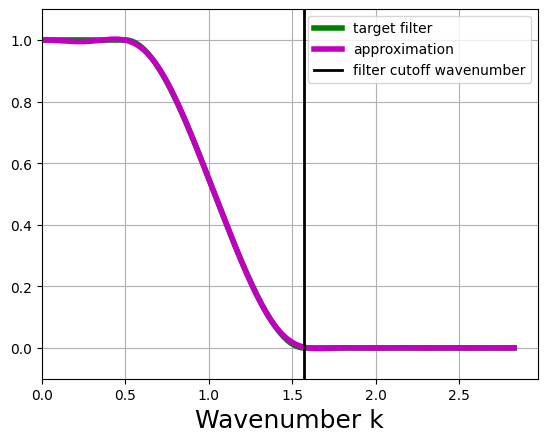

In [68]:
filter_list_t[2].plot_shape()
plt.savefig('figures/taper.png')